# ----------------MEDICAL INSURANCE COST PREDICTION MODEL-------------------

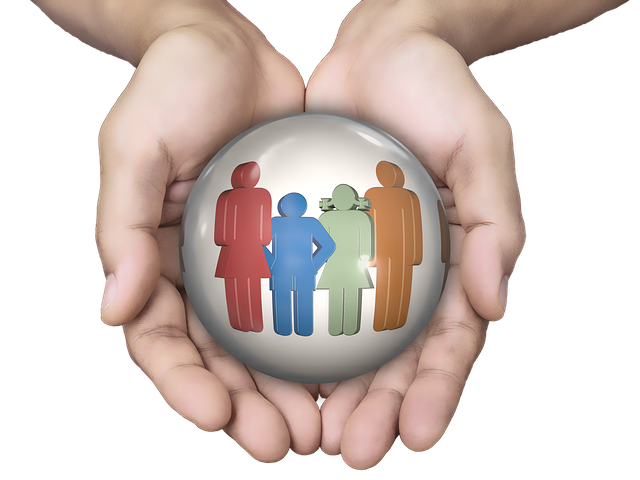

# Import Library 

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read the data 

In [2]:
df = pd.read_csv('insurance-Copy1.csv')

#Reading the dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Displaying the top 5 Rows of dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Displaying last 5 Rows of the data set

df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Finding the shape of the dataset

Checking the shape of data i.e. checking the number of rows and columns

In [5]:
#checking shape

df.shape

(1338, 7)

In [6]:
print("Number of Rows :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of Rows : 1338
Number of columns : 7


## df info

Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking the null value

In [8]:
#We need to check null value in our dataset if there having any 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Getting the overall Statistics About The Dataset

using of the descirbe function it generally provide us all the statistical data of the dataset of numeric data

In [9]:
#get all statistical data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Converting the string value in numeric value 

Generally encoding the categorical data or string in numeric order

In [11]:
#Changing values of sex column

df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
#changing this value into numeric order
df['sex'] = df['sex'].map({'female':0 , 'male':1})

In [13]:
#checking the change by head()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
#Changing values of smoker column

df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
#changing this value into numeric data

df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [16]:
#checking the change using head()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
#Changing values of region column

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
#changing the value into numeric data

df['region'] = df['region'].map({'southwest':1, 'southeast':2, 
                                 'northwest':3, 'northeast':4})

In [20]:
#checking the change by head()

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


As all data is converted into the numeric data

In [22]:
#checking the columns in the dataset

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## TRAINGING OF THE DATA

First need to check dependent data and independent data 

In [24]:
#storing the independent variables

x = df.drop(['charges'],axis = 1)

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [26]:
#storing the dependent variable

y = df['charges']

In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
#training the data by dividing it into train and test

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42 )

# Applying the Machine Learning Algorithm

USING DIFFERENT ALGORITHM AND CHECK WHICH ONE IS BEST TO TRAIN THE MODEL

In [29]:
#Appling LINEAR REGRESSION ALGORITHM
lr = LinearRegression()
lr.fit(x_train,y_train)

#Applying DECISSION TREE ALGORITHM
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

#Applying RANDOM FOREST ALGORITHM
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
#creating the prediction variables for all algorithm

#prediction variable for LINEAR REGRESSION
y_pred1 = lr.predict(x_test)

#prediction variable for DECISSION TREE REGRESSION
y_pred2 = dtr.predict(x_test)

#prediction variable for RANDOM FOREST
y_pred3 = rf.predict(x_test)

Creating a new dataframe to get the Actual and the predicted value by th above algorithms

In [31]:
#creating the actual and predicted value dataframe

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'dtr':y_pred2,'rf':y_pred3})

In [32]:
df1

,Actual,Lr,dtr,rf
764,9095.06825,8924.407244,7518.02535,10778.048850
887,5272.17580,7116.295018,5469.00660,5312.595520
890,29330.98315,36909.013521,28950.46920,28245.853953
1293,9301.89355,9507.874691,9500.57305,9763.137119
259,33750.29180,27013.350008,33732.68670,34535.659370
...,...,...,...,...
109,47055.53210,39116.968669,46599.10840,46935.201712
575,12222.89830,11814.555568,11073.17600,12851.969316
535,6067.12675,7638.107736,6555.07035,6468.456685
543,63770.42801,40959.081722,47269.85400,47112.097915


## VISUAL APPROACH

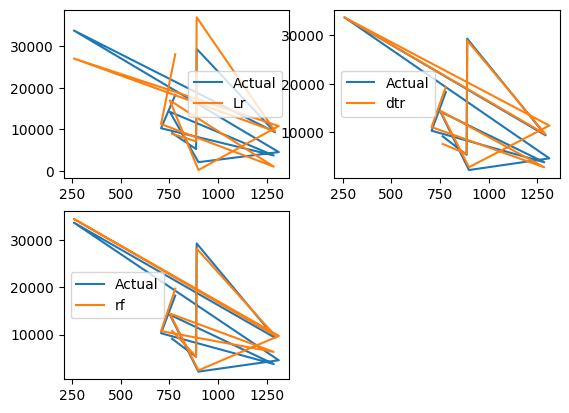

In [33]:
#Visual
    
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['Lr'].iloc[0:11],label = 'Lr')
#plt.tight_layout()
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['dtr'].iloc[0:11],label = 'dtr')
#plt.tight_layout()
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['rf'].iloc[0:11],label = 'rf')
#plt.tight_layout()
plt.legend()


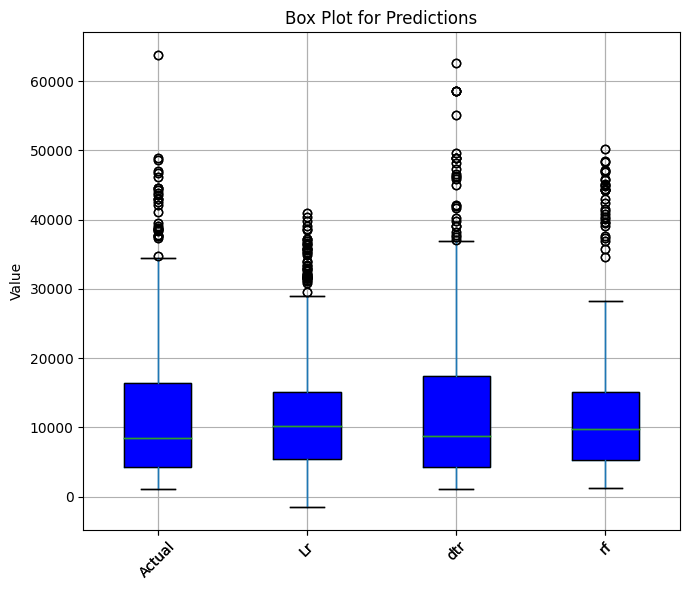

In [34]:
#box plot
df1 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'dtr': y_pred2, 'rf': y_pred3})

# Specify the columns explicitly as a list
columns_to_plot = ['Actual', 'Lr', 'dtr', 'rf']

# Create a box plot for each column
plt.figure(figsize=(7, 6))
df1[columns_to_plot].boxplot()
boxplot = df1[columns_to_plot].boxplot(patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title('Box Plot for Predictions')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

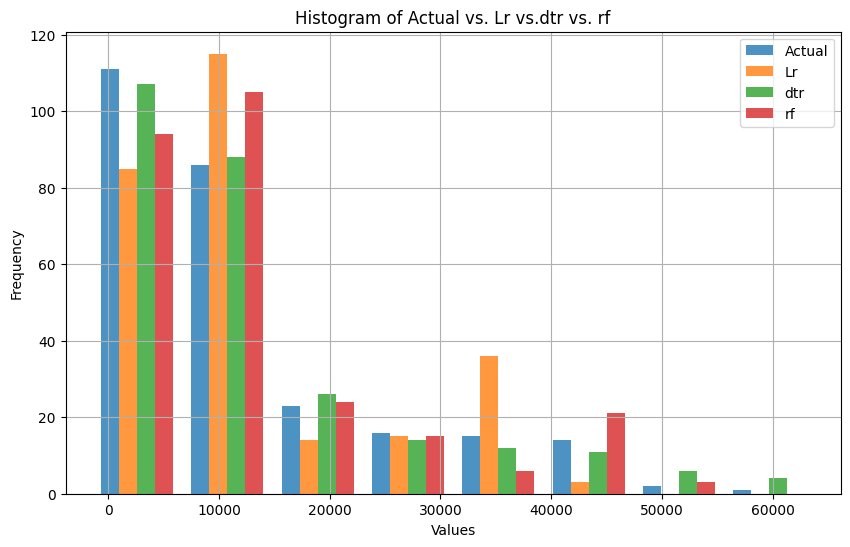

In [35]:

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist([df1['Actual'], df1['Lr'],df1['dtr'],df1['rf']], bins=8, alpha=0.8, label=['Actual', 'Lr','dtr','rf'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs. Lr vs.dtr vs. rf')
plt.legend()
plt.grid(True)
plt.show()


## TESTING THE ACCURACY 

Here we check how much our model in give accurate predict result

It will also check all three alogirthm we used in this 
that , which one and how much are predicting the accurate result

In [36]:
#Evaluating the model by r2 test, MAE(Mean Absolute Error) , RMSE(Root Mean Square Error)

In [37]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy
    print("Model evaluation Done")

In [38]:
# Split your dataset into training and testing sets (adjust the test_size as needed)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Now, you can proceed with your code to train and test your models
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    prediction1 = model.predict(xtest)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain, ytrain, xtest, ytest), '\n')

Model: LinearRegression
MAE : 4186.51
RMSE : 5799.59
R2 score : 0.78
Train Accuracy : 0.7417049283233981
Test Accuracy : 0.7833463107364539
Model evaluation Done
None 

Model: DecisionTree
MAE : 3145.63
RMSE : 6943.26
R2 score : 0.69
Train Accuracy : 0.9983078124756305
Test Accuracy : 0.6894730794933133
Model evaluation Done
None 

Model: RandomForest
MAE : 2524.77
RMSE : 4653.39
R2 score : 0.86
Train Accuracy : 0.9753709157055903
Test Accuracy : 0.8605204383954027
Model evaluation Done
None 



As here we can see the accuracy of the best result we get here by the RANDOMFOREST out of all the three algorithm so for the further use we use RANDOMFOREST as our main algorithm for this model 

In [39]:
Data = {'age':40,
       'sex':1,
       'bmi':40.30,
       'children':4,
       'smoker':1,
       'region':2}

df_1 = pd.DataFrame(Data,index =[0])
df_1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [40]:
#prediction of value

new_predict = rf.predict(df_1)
print(new_predict)

[43138.2495431]


Now saving our model with the JOBLIB library so it can be train and test for the whole data and there is not having any use for the training of model again and again

In [41]:
rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [42]:
#using joblib 

#save using joblib

import joblib

In [43]:
#save using joblib

joblib.dump(rf,'insurance_price_predict_rf')

['insurance_price_predict_rf']

In [44]:
#loading of the data

model = joblib.load('insurance_price_predict_rf')

In [45]:
#checking predict value

model.predict(df_1)

array([42525.5588895])

## GUI

Using of gui make easier for the user to interact with the machine 

In [46]:
#gui


In [47]:
#using joblib


In [ ]:
import tkinter as tk
from tkinter import ttk
import joblib
from ttkthemes import ThemedStyle
import tkinter.messagebox as msgbox
from tkinter import messagebox
from tkinter import filedialog
# Define a dictionary to map regions to numeric values
region_mapping = {
    "southwest": 1,
    "southeast": 2,
    "northwest": 3,
    "northeast": 4
}

# Function to get the numeric value of the selected region
def get_numeric_region(selected_region):
    return region_mapping.get(selected_region, 0)

def show_entry():
    try:
        p1 = float(e1.get())
        p2 = get_selected_gender()
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = get_selected_smoker()
        p6 = get_numeric_region(region_combobox.get())

        model = joblib.load('insurance_price_predict_rf')
        result = model.predict([[p1, p2, p3, p4, p5, p6]])

        result_label.config(text=f"Insurance cost: ${result[0]:.2f}", font=("Helvetica", 14, "bold"))
        history_listbox.insert(0, f"Age: {p1}, Gender: {p2}, BMI: {p3}, Children: {p4}, Smoker: {p5}, Region: {p6} -> ${result[0]:.2f}")

    except ValueError:
        msgbox.showerror("Error", "Invalid input. Please enter numeric values for all fields.")

def reset_fields():
    e1.delete(0, "end")
    clear_gender_selection()
    e3.delete(0, "end")
    e4.delete(0, "end")
    clear_smoker_selection()
    region_combobox.set("Select Region")
    result_label.config(text="")

def on_entry_click(event):
    entry = event.widget
    if entry.get() == entry.default_text:
        entry.delete(0, "end")
        entry.config(fg="black")

def on_entry_leave(event):
    entry = event.widget
    if entry.get() == "":
        entry.insert(0, entry.default_text)
        entry.config(fg="gray")

#def clear_gender_selection():
    #male_radio.deselect()
    #female_radio.deselect()
def clear_gender_selection():
    male_var.set(0)  # Clear the male_var
    female_var.set(0)  # Clear the female_var

def get_selected_gender():
    if male_var.get() == 1:
        return 1  # Male
    elif female_var.get() == 1:
        return 0  # Female
    else:
        return 0  # Default to Female if nothing is selected

#def clear_smoker_selection():
    #yes_radio.deselect()
    #no_radio.deselect()
def clear_smoker_selection():
    yes_var.set(0)  # Clear the yes_var
    no_var.set(0)  # Clear the no_var
    
def get_selected_smoker():
    if yes_var.get() == 1:
        return 1  # yes
    elif no_var.get() == 1:
        return 0  # no
    else:
        return 0 
    

root = tk.Tk()
root.title("Insurance Cost Predictor")
root.geometry("750x650")
root.resizable(True, True)
root.configure(bg="#F4F4F4")

style = ThemedStyle(root)
style.set_theme("keramik")

# Background color
root.configure(bg="#F4F4F4")

# Apply a themed style ('keramik' theme)
style = ThemedStyle(root)
style.set_theme("keramik")

# Function to save data to a file
def save_data():
    data = {
        "Age": e1.get(),
        "Gender": get_selected_gender(),
        "BMI": e3.get(),
        "Children": e4.get(),
        "Smoker": get_selected_smoker(),
        "Region": region_combobox.get(),
    }
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text Files", "*.txt")])
    if file_path:
        with open(file_path, "w") as file:
            for key, value in data.items():
                file.write(f"{key}: {value}\n")
        messagebox.showinfo("Save Successful", "Data has been saved successfully.")

# Function to load data from a file
def load_data():
    file_path = filedialog.askopenfilename(filetypes=[("Text Files", "*.txt")])
    if file_path:
        data = {}
        with open(file_path, "r") as file:
            lines = file.readlines()
            for line in lines:
                key, value = line.strip().split(": ")
                data[key] = value
        e1.delete(0, tk.END)
        e3.delete(0, tk.END)
        e4.delete(0, tk.END)
        region_combobox.set(data["Region"])
        # Set gender and smoker radio buttons based on loaded data
        if data["Gender"] == "Male":
            male_var.set(1)
        elif data["Gender"] == "Female":
            female_var.set(1)
        if data["Smoker"] == "Yes":
            yes_var.set(1)
        elif data["Smoker"] == "No":
            no_var.set(1)
        messagebox.showinfo("Load Successful", "Data has been loaded successfully.")

def update_tooltip(event):
    widget = event.widget
    tooltip_text = widget.tooltip
    widget_tooltip.config(text=tooltip_text)

def change_theme(event):
    selected_theme = theme_combobox.get()
    style.set_theme(selected_theme)

def display_info():
    info_text = "Welcome to the Insurance Cost Predictor App!\n\n"
    info_text += "This application helps you estimate your insurance cost based on various factors such as age, gender, BMI, number of children, smoking habits, and region. Here's how to use it:\n\n"
    info_text += "1. Enter your age, BMI, and the number of children you have in the respective fields.\n"
    info_text += "2. Select your gender from the 'Select Gender' radio buttons (Male or Female).\n"
    info_text += "3. Choose whether you are a smoker or not from the 'Select Smoker or not' radio buttons (Yes or No).\n"
    info_text += "4. Select your region from the 'Select Region' dropdown menu.\n"
    info_text += "5. Click the 'Predict' button to estimate your insurance cost based on the provided information.\n"
    info_text += "6. You can save and load your data using the 'Save Data' and 'Load Data' buttons, respectively.\n"
    info_text += "7. You can also change the app's theme using the 'Select Theme' dropdown.\n"
    info_text += "8. The prediction history is displayed in the 'Prediction History' panel on the right.\n\n"
    info_text += "Enjoy using the Insurance Cost Predictor App!"
    
    messagebox.showinfo("Info", info_text)


def region_data(event):
    selected_region = region_combobox.get()
    if selected_region == "southwest":
        # Handle southwest selection
        return 1
    elif selected_region == "southeast":
        # Handle southeast selection
        return 2
    elif selected_region == "northwest":
        # Handle northwest selection
        return 3
    elif selected_region == "northeast":
        # Handle northeast selection
        return 4
    
def gender_data(value):
    selected_gender = gender_combobox.get()
    if selected_gender == "male":
        return 1
    elif selected_gender == "female":
        return 0
    
    
title_label = ttk.Label(root, text="Insurance Cost Prediction", font=("Helvetica", 20, "bold"), background="blue",foreground="white")
title_label.grid(row=0, column=0, columnspan=2, pady=(20, 10), sticky="n")

labels = ["Enter Age","Select Gender", "Enter BMI", "Enter number of Children", "Select Smoker or not", "Select Region"]
for i, label_text in enumerate(labels):
    label = ttk.Label(root, text=label_text, font=("Helvetica", 12, "bold"), background="#F4F4F4")
    label.grid(row=i+1, column=0, padx=10, pady=5, sticky="w")

# Entry fields with placeholders
e1 = ttk.Entry(root, font=("Helvetica", 12), justify="center")  # Set the initial text color to gray
e1.insert(0, "Enter Age")
e1.default_text = "Enter Age"
e3 = ttk.Entry(root, font=("Helvetica", 12), justify="center")
e3.insert(0, "Enter BMI")
e3.default_text = "Enter BMI"
e4 = ttk.Entry(root, font=("Helvetica", 12), justify="center")
e4.insert(0, "Enter Children")
e4.default_text = "Enter Children"

e1.grid(row=1, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)

e1.tooltip = "Enter Age (numeric)"
e3.tooltip = "Enter BMI (numeric)"
e4.tooltip = "Enter Children (numeric)"

e1.bind("<Enter>", update_tooltip)
e3.bind("<Enter>", update_tooltip)
e4.bind("<Enter>", update_tooltip)
e1.bind("<FocusIn>", on_entry_click)
e1.bind("<FocusOut>", on_entry_leave)
e3.bind("<FocusIn>", on_entry_click)
e3.bind("<FocusOut>", on_entry_leave)
e4.bind("<FocusIn>", on_entry_click)
e4.bind("<FocusOut>", on_entry_leave)

# Create gender radio buttons
gender_label = ttk.Label(root, text="Select Gender", font=("Helvetica", 12, "bold"), background="#F4F4F4")
gender_label.grid(row=2, column=0, padx=10, pady=5, sticky="w")

male_var = tk.IntVar()
female_var = tk.IntVar()

male_radio = ttk.Radiobutton(root, text="Male", variable=male_var, value=1)
female_radio = ttk.Radiobutton(root, text="Female", variable=female_var, value=2)

# Reduce padding and internal padding
male_radio.grid(row=2, column=1, padx=(0, 2), pady=5, ipadx=0, sticky="w")
female_radio.grid(row=2, column=1, padx=(2, 0), pady=5, ipadx=0, sticky="e")

# Create smoker radio buttons
smoker_label = ttk.Label(root, text="Select smoker or not", font=("Helvetica", 12, "bold"), background="#F4F4F4")
smoker_label.grid(row=5, column=0, padx=10, pady=5, sticky="w")

yes_var = tk.IntVar()
no_var = tk.IntVar()

yes_radio = ttk.Radiobutton(root, text="Yes", variable=yes_var, value=1)
no_radio = ttk.Radiobutton(root, text="No", variable=no_var, value=2)

# Reduce padding and internal padding
yes_radio.grid(row=5, column=1, padx=(0, 2), pady=5, ipadx=0, sticky="w")
no_radio.grid(row=5, column=1, padx=(2, 0), pady=5, ipadx=0, sticky="e")


# Create the region combobox
regions = ["southwest", "southeast", "northwest", "northeast"]
region_combobox = ttk.Combobox(root, values=regions, font=("Helvetica", 12), justify="center")
region_combobox.grid(row=6, column=1)
region_combobox.set("Select Region")  # Default text for the combobox
region_combobox.bind("<<ComboboxSelected>>", region_data)


predict_button = ttk.Button(root, text="Predict", command=show_entry,cursor="hand2", width=20, style="TButton")
predict_button.grid(row=7, column=0, columnspan=1, pady=(20, 30))

reset_button = ttk.Button(root, text="Reset", command=reset_fields, cursor="hand2", width=20, style="TButton")
reset_button.grid(row=7, column=1, columnspan=3, pady=(5, 10))

# Result label
result_label = ttk.Label(root, text="", font=("Helvetica", 16, "bold"), background="blue",foreground="white")
result_label.grid(row=12, column=0, columnspan=2, pady=10)

# Save and Load buttons
save_button = ttk.Button(root, text="Save Data", command=save_data, cursor="hand2", width=20, style="TButton")
save_button.grid(row=8, column=0, pady=(5, 20))

load_button = ttk.Button(root, text="Load Data", command=load_data, cursor="hand2", width=20, style="TButton")
load_button.grid(row=8, column=1, pady=(5, 20))

# Theme selection combobox
theme_label = ttk.Label(root, text="Select Theme", font=("Helvetica", 12, "bold"), background="#F4F4F4")
theme_label.grid(row=11, column=0, padx=10, pady=5, sticky="w")
themes = style.get_themes()
theme_combobox = ttk.Combobox(root, values=themes, state="readonly", font=("Helvetica", 12))
theme_combobox.grid(row=11, column=1)
theme_combobox.bind("<<ComboboxSelected>>", change_theme)
theme_combobox.set("keramik")  # Default theme

# Info button
info_button = ttk.Button(root, text="Info", command=display_info, cursor="hand2", style="TButton")
info_button.grid(row=10, column=0, columnspan=2, pady=10)

# Tooltips
widget_tooltip = ttk.Label(root, text="", font=("Helvetica", 10), background="#F4F4F4")
widget_tooltip.grid(row=9, column=0, columnspan=2, pady=(0, 10))

# History panel
history_label = ttk.Label(root, text="Prediction History", font=("Helvetica", 14, "bold"),background ="blue",foreground="white")
history_label.grid(row=1, column=6, columnspan=2, padx=10, pady=10, sticky="n")

history_frame = ttk.Frame(root)
history_frame.grid(row=3, column=6, rowspan=9, columnspan=2, padx=10, pady=10, sticky="nsew")
history_frame.grid_propagate(False)

history_scrollbar = ttk.Scrollbar(history_frame)
history_scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

history_listbox = tk.Listbox(history_frame, font=("Helvetica", 12), yscrollcommand=history_scrollbar.set)
history_listbox.pack(fill=tk.BOTH, expand=True)

history_scrollbar.config(command=history_listbox.yview)

root.mainloop()
